In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Product_data.csv')

In [4]:
print(df.head())

     everyday productid                 productname  quantity
0  2023-08-16   D_10006                CURD - 200 G      60.0
1  2023-08-16   D_10029  STANDARDISED MILK - 500 ml      48.0
2  2023-08-16   D_10006                CURD - 200 G      60.0
3  2023-08-16   D_10017  DOUBLE TONED MILK - 500 ml      72.0
4  2023-08-16   D_10033         TONED MILK - 500 ml      24.0


In [5]:
df.shape

(2516944, 4)

In [6]:
# Filter for product ID D_10006
df_filtered = df[df['productid'] == 'D_20009']

# Group by date and sum quantity
df_grouped = df_filtered.groupby('everyday')['quantity'].sum().reset_index()

#everyday datatype changed into datetime
df_grouped['everyday'] = pd.to_datetime(df_grouped['everyday'])

In [7]:
# Set 'date' column as the index
df_grouped.set_index('everyday', inplace=True)

In [11]:
df_filtered.head()

,everyday,productid,productname,quantity
40736,2023-05-20,D_20009,PANEER - 200 g,5.0
226871,2023-01-17,D_20009,PANEER - 200 g,5.0
306232,2023-07-22,D_20009,PANEER - 200 g,1.0
518402,2022-10-14,D_20009,PANEER - 200 g,5.0
690743,2022-11-03,D_20009,PANEER - 200 g,5.0


In [8]:
print(df_grouped)

            quantity
everyday            
2022-10-03      15.0
2022-10-05      10.0
2022-10-06       5.0
2022-10-08       5.0
2022-10-14       5.0
2022-10-31      15.0
2022-11-02      15.0
2022-11-03       5.0
2022-11-18      10.0
2022-11-26      10.0
2022-12-16       5.0
2022-12-27      15.0
2023-01-04      10.0
2023-01-08      10.0
2023-01-14       5.0
2023-01-17       5.0
2023-01-19      10.0
2023-01-20      10.0
2023-02-12      10.0
2023-02-13      10.0
2023-02-19       5.0
2023-03-07       5.0
2023-03-08      10.0
2023-03-31       1.0
2023-04-29       5.0
2023-05-02      10.0
2023-05-20       5.0
2023-05-21      10.0
2023-05-22      10.0
2023-06-19       5.0
2023-06-27       5.0
2023-07-22       1.0


In [9]:
df_grouped.shape

(32, 1)

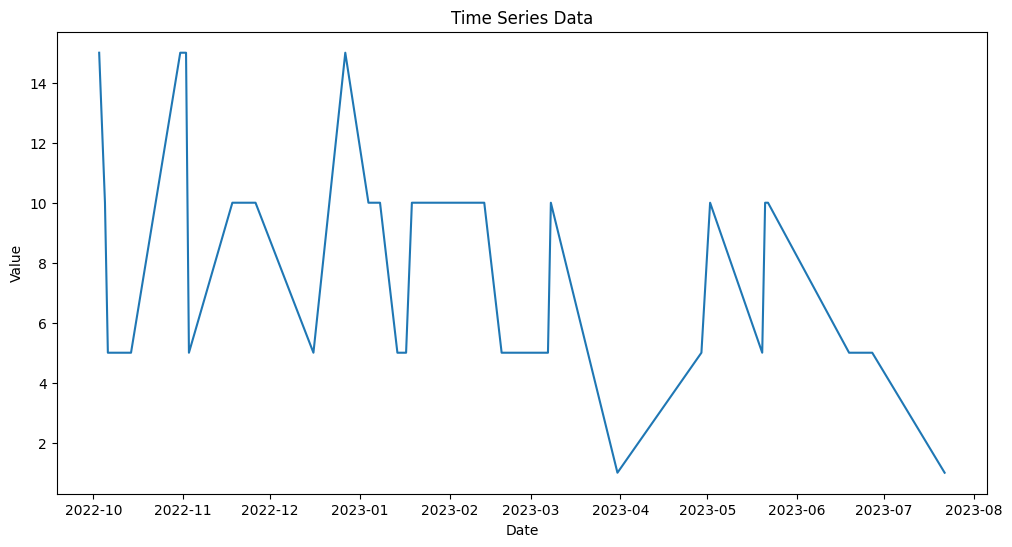

In [10]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [12]:
# Try different period values based on assumed seasonality
periods_to_try = [7, 30, 60]  # Daily, monthly, yearly patterns

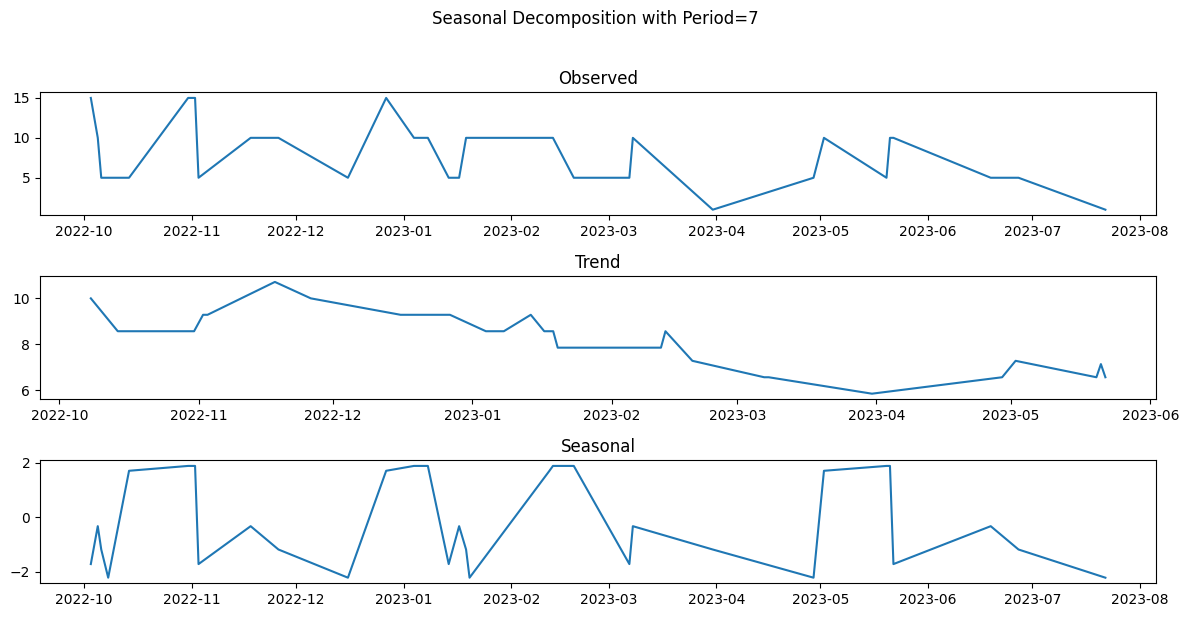

ValueError: x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)

In [13]:
for period_value in periods_to_try:
    result = seasonal_decompose(df_grouped['quantity'], model='additive', period=period_value)
    
    # Plot the decomposed components
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Seasonal Decomposition with Period={period_value}', y=1.02)

    plt.subplot(3, 1, 1)
    plt.plot(result.observed)
    plt.title('Observed')

    plt.subplot(3, 1, 2)
    plt.plot(result.trend)
    plt.title('Trend')

    plt.subplot(3, 1, 3)
    plt.plot(result.seasonal)
    plt.title('Seasonal')

    plt.tight_layout()
    plt.show()